In [1]:
%pylab --no-import-all inline
#
# Temporary hack needed to make the gridtools package visible from the notebook.
# No longer needed when GT4Py will be installed as a regular Python package (i.e. through  setup.py)
#
import os
os.chdir(os.path.abspath('..'))

import networkx as nx
from gridtools.stencil import Stencil, MultiStageStencil
from tests.test_sw import LocalSWTest

Populating the interactive namespace from numpy and matplotlib


This is a demonstration if data dependency analysis features using a Shallow Water stencil.

Here is the code for reference:

In [2]:
t = LocalSWTest()
t.setUp()
t._run()

Let's get a direct reference to the stencil to simplify the commands a bit

In [3]:
stencil = t.stencil

List the stencil stages

In [4]:
stencil.stages

[localsw_002_stage_momentum_001,
 localsw_002_stage_momentum_002,
 localsw_002_stage_momentum_000,
 localsw_002_stage_003]

Plot data dependencies at stencil scope and stage execution dependencies

Suggestion: run this cell until you get decent-looking graphs.
Networkx can generate some weird and intricate node arrangements...

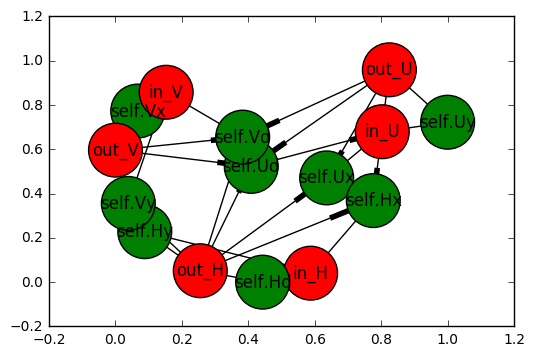

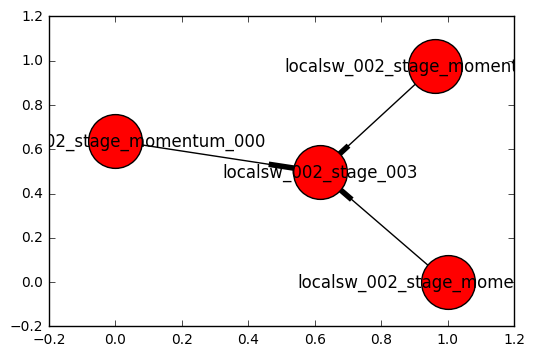

In [5]:
stencil.plot_data_dependency(show_legend=False)
stencil.plot_stage_execution()

We can get a reference to the stencil's data dependency graph to analyze it in more detail

In [6]:
stdd = stencil.get_data_dependency()

Symbols detected at stencil scope

In [7]:
stencil.scope.data_dependency.nodes()

[self.Ud,
 self.Vd,
 out_H,
 self.Uy,
 out_U,
 in_H,
 self.Ux,
 self.Hy,
 in_U,
 self.Hd,
 self.Hx,
 self.Vx,
 out_V,
 in_V,
 self.Vy]

Print the data dependency connections

In [8]:
stencil.scope.data_dependency.edges()

[(self.Ud, in_U),
 (self.Vd, in_V),
 (out_H, self.Ud),
 (out_H, self.Hd),
 (out_H, self.Hx),
 (out_H, self.Vd),
 (out_H, self.Ux),
 (out_H, self.Hy),
 (out_H, self.Vy),
 (self.Uy, in_U),
 (out_U, self.Ud),
 (out_U, self.Ux),
 (out_U, self.Hx),
 (out_U, self.Uy),
 (out_U, self.Vd),
 (self.Ux, in_U),
 (self.Hy, in_H),
 (self.Hd, in_H),
 (self.Hx, in_H),
 (self.Vx, in_V),
 (out_V, self.Ud),
 (out_V, self.Vd),
 (out_V, self.Vx),
 (out_V, self.Hy),
 (out_V, self.Vy),
 (self.Vy, in_V)]

In [9]:
stencil.scope.symbol_table

{'in_H': in_H,
 'in_U': in_U,
 'in_V': in_V,
 'out_H': out_H,
 'out_U': out_U,
 'out_V': out_V,
 'self.Hd': self.Hd,
 'self.Hx': self.Hx,
 'self.Hy': self.Hy,
 'self.Ud': self.Ud,
 'self.Ux': self.Ux,
 'self.Uy': self.Uy,
 'self.Vd': self.Vd,
 'self.Vx': self.Vx,
 'self.Vy': self.Vy,
 'self.bl': self.bl,
 'self.dt': self.dt,
 'self.growth': self.growth}

Print a list of predecessors of each node starting from the final `out_H` data.
In simpler terms, for each node, print the nodes that depend on it (due to the way this graph is constructed).

In [10]:
nx.predecessor(stdd,'out_U')

{self.Ud: ['out_U'],
 self.Vd: ['out_U'],
 self.Hx: ['out_U'],
 self.Uy: ['out_U'],
 'out_U': [],
 in_H: [self.Hx],
 self.Ux: ['out_U'],
 in_V: [self.Vd],
 in_U: [self.Ud, self.Ux, self.Uy]}

For a given node, print the nodes it depends on

In [11]:
stdd.successors('out_H')

[self.Ud, self.Hd, self.Hx, self.Vd, self.Ux, self.Hy, self.Vy]

Plot data dependency for each stage

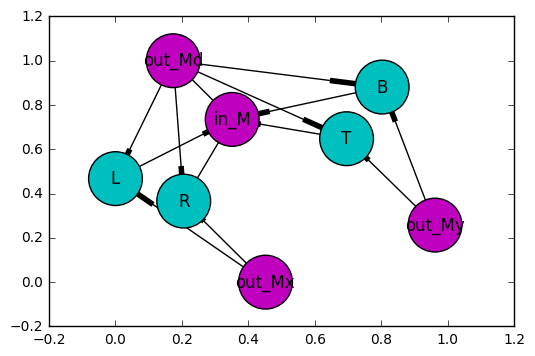

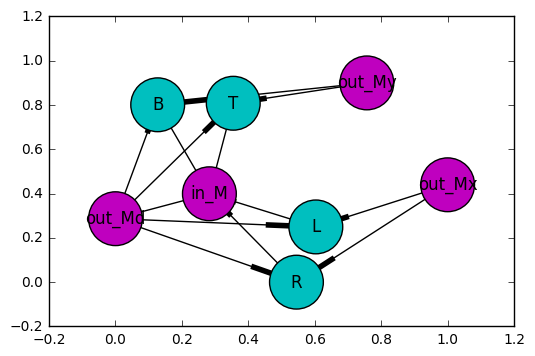

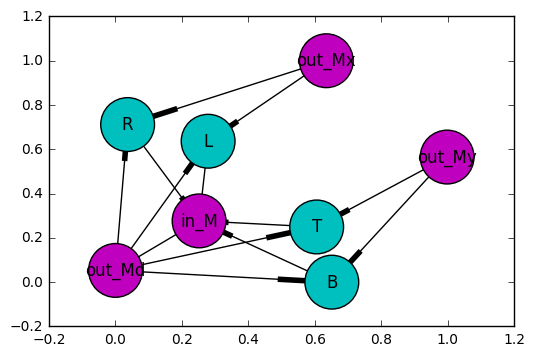

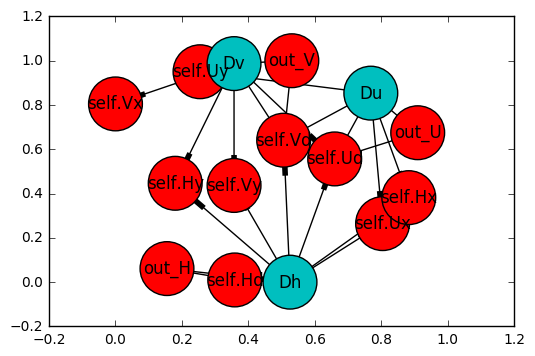

In [12]:
for stg in stencil.stages:
    stencil.plot_data_dependency(stg.get_data_dependency(), stg.scope, show_legend=False)

Symbol tables (dictionaries) for each stage
Note that the tables contain also the symbols at stencil scope that have been aliased by other symbols in the stage scope!
On the other hand, the aliased symbols are **not** present in the dependency graph.

In [13]:
for stg in stencil.stages:
    print('Stage: %s' % stg.name)
    print(stg.scope.symbol_table,'\n')

Stage: localsw_002_stage_momentum_001
{'self.Vd': self.Vd, 'out_Md': out_Md, 'in_M': in_M, 'T': T, 'out_Mx': out_Mx, 'self.Vx': self.Vx, 'B': B, 'in_V': in_V, 'R': R, 'L': L, 'out_My': out_My, 'self.Vy': self.Vy} 

Stage: localsw_002_stage_momentum_002
{'out_Md': out_Md, 'in_M': in_M, 'T': T, 'in_H': in_H, 'self.Hd': self.Hd, 'self.Hy': self.Hy, 'self.Hx': self.Hx, 'out_Mx': out_Mx, 'B': B, 'L': L, 'out_My': out_My, 'R': R} 

Stage: localsw_002_stage_momentum_000
{'self.Ud': self.Ud, 'self.Uy': self.Uy, 'in_M': in_M, 'T': T, 'out_Mx': out_Mx, 'self.Ux': self.Ux, 'in_U': in_U, 'B': B, 'out_Md': out_Md, 'L': L, 'out_My': out_My, 'R': R} 

Stage: localsw_002_stage_003
{'self.Ud': self.Ud, 'self.Vd': self.Vd, 'out_H': out_H, 'self.Uy': self.Uy, 'out_U': out_U, 'self.Ux': self.Ux, 'self.Hy': self.Hy, 'self.Hd': self.Hd, 'self.Hx': self.Hx, 'self.Vx': self.Vx, 'out_V': out_V, 'Du': Du, 'Dh': Dh, 'Dv': Dv, 'self.Vy': self.Vy} 



Values from a symbol table or nodes from a data dependency graph are `Symbol` objects!

In [14]:
sym_tbl_obj = stencil.stages[0].scope.symbol_table['in_M']
print(type(sym_tbl_obj))

dep_graph_obj = stencil.stages[0].get_data_dependency().nodes()[0]
print(type(dep_graph_obj))

<class 'gridtools.symbol.Symbol'>
<class 'gridtools.symbol.Symbol'>


Finally, a nice OpenGL animation

In [16]:
t.test_animation(5000)